#Import librarys

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

##Get MNIST

In [2]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_image = tf.reshape(train_images, [-1, 28, 28, 1])
test_image = tf.reshape(test_images, [-1, 28, 28, 1])

11493376/11490434 [==============================] - 0s 0us/step


##Define Models

1. Model 1 : 3 Layers

2. Model 2 : 5 Layers

3. Model 3 : 7 Layers

In [0]:
models = [
         keras.models.Sequential([
                                  keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
                                  keras.layers.MaxPool2D((2,2)),
                                  keras.layers.Flatten(),
                                  keras.layers.Dense(10, activation='softmax')]),
         keras.models.Sequential([
                                  keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
                                  keras.layers.MaxPool2D((2,2)),
                                  keras.layers.Conv2D(64, (3,3), activation='relu'),
                                  keras.layers.MaxPool2D((2,2)),
                                  keras.layers.Flatten(),
                                  keras.layers.Dense(10, activation='softmax')]),
         keras.models.Sequential([
                                  keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
                                  keras.layers.MaxPool2D((2,2)),
                                  keras.layers.Conv2D(64, (3,3), activation='relu'),
                                  keras.layers.Conv2D(64, (3,3), activation='relu'),
                                  keras.layers.MaxPool2D((2,2)),
                                  keras.layers.Conv2D(128, (3,3), activation='relu'),
                                  keras.layers.Flatten(),
                                  keras.layers.Dense(10, activation='softmax')])
]

##Training

In [4]:
for m in models:
  print('model', models.index(m), 'training start')
  m.compile(
      optimizer='adam',
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy'])
  m.fit(train_image, train_labels, epochs=5)
  print('model', models.index(m), 'training end\n')

model 0 training start
Epoch 1/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.5983 - accuracy: 0.9379
Epoch 2/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0853 - accuracy: 0.9751
Epoch 3/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0702 - accuracy: 0.9784
Epoch 4/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0595 - accuracy: 0.9822
Epoch 5/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0540 - accuracy: 0.9839
model 0 training end

model 1 training start
Epoch 1/5
1875/1875 [==============================] - 48s 26ms/step - loss: 0.3836 - accuracy: 0.9430
Epoch 2/5
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0710 - accuracy: 0.9792
Epoch 3/5
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0556 - accuracy: 0.9834
Epoch 4/5
1875/1875 [==============================] - 48s 25ms/step - loss: 0.0489 - accuracy: 0.9849
Epoch

##Test Loss and Accuracy

In [5]:
for m in models:
  print('model', models.index(m) + 1, 'loss/accuracy')
  test_loss, accuracy = m.evaluate(test_image, test_labels, verbose=2)
  print('\nTest loss :', test_loss)
  print('test accuracy :', accuracy, '\n')

model 1 loss/accuracy
313/313 - 1s - loss: 0.1263 - accuracy: 0.9748

Test loss : 0.12625135481357574
test accuracy : 0.9747999906539917 

model 2 loss/accuracy
313/313 - 2s - loss: 0.0514 - accuracy: 0.9869

Test loss : 0.051387280225753784
test accuracy : 0.9868999719619751 

model 3 loss/accuracy
313/313 - 4s - loss: 0.0401 - accuracy: 0.9885

Test loss : 0.04014071077108383
test accuracy : 0.9884999990463257 



## Plot Result

1. Model 1 - Correct

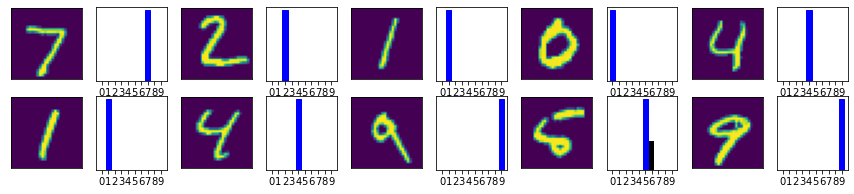

In [7]:
def print_image(image):
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)

def print_pred(pred, real):
  thisplot = plt.bar(range(10), pred, color='k')
  plt.grid(False)
  plt.xticks([0,1,2,3,4,5,6,7,8,9])
  plt.yticks([])
  thisplot[np.argmax(pred)].set_color('red')
  thisplot[real].set_color('blue')

predictions = models[0].predict(test_image)
plt.figure(figsize=(15,3))
i = 0
for t in range(len(test_images)):
  if np.argmax(predictions[t]) != test_labels[t]: continue
  elif i == 10 : break;
  plt.subplot(2,10,2*i + 1)
  print_image(test_images[t])
  plt.subplot(2,10,2*i + 2)
  print_pred(predictions[t], test_labels[t])
  i += 1
plt.show()

2. Model 1 - Wrong

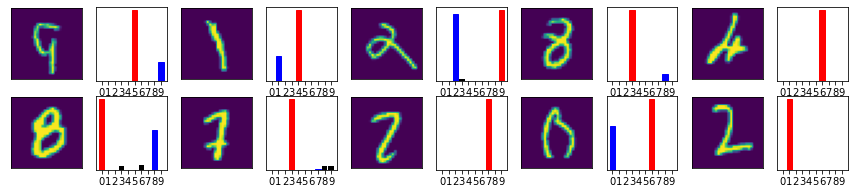

In [8]:
plt.figure(figsize=(15,3))
i = 0
for t in range(len(test_images)):
  if np.argmax(predictions[t]) == test_labels[t]: continue
  elif i == 10 : break;
  plt.subplot(2,10,2*i + 1)
  print_image(test_images[t])
  plt.subplot(2,10,2*i + 2)
  print_pred(predictions[t], test_labels[t])
  i += 1
plt.show()

3. Model 2 - Correct

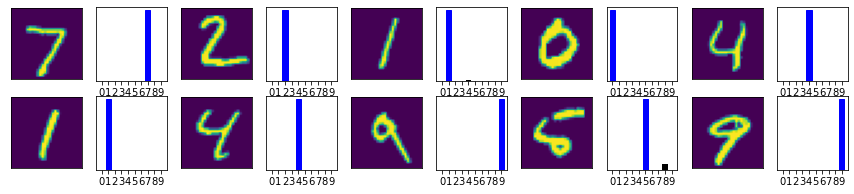

In [9]:
predictions = models[1].predict(test_image)
plt.figure(figsize=(15,3))
i = 0
for t in range(len(test_images)):
  if np.argmax(predictions[t]) != test_labels[t]: continue
  elif i == 10 : break;
  plt.subplot(2,10,2*i + 1)
  print_image(test_images[t])
  plt.subplot(2,10,2*i + 2)
  print_pred(predictions[t], test_labels[t])
  i += 1
plt.show()

4. Model 2 - Wrong

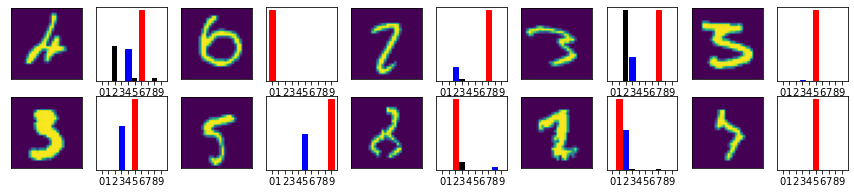

In [10]:
plt.figure(figsize=(15,3))
i = 0
for t in range(len(test_images)):
  if np.argmax(predictions[t]) == test_labels[t]: continue
  elif i == 10 : break;
  plt.subplot(2,10,2*i + 1)
  print_image(test_images[t])
  plt.subplot(2,10,2*i + 2)
  print_pred(predictions[t], test_labels[t])
  i += 1
plt.show()

5. Model 3 - Correct

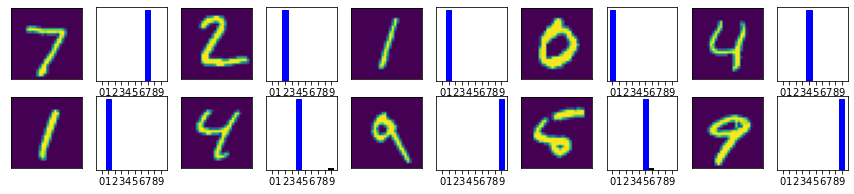

In [11]:
predictions = models[2].predict(test_image)
plt.figure(figsize=(15,3))
i = 0
for t in range(len(test_images)):
  if np.argmax(predictions[t]) != test_labels[t]: continue
  elif i == 10 : break;
  plt.subplot(2,10,2*i + 1)
  print_image(test_images[t])
  plt.subplot(2,10,2*i + 2)
  print_pred(predictions[t], test_labels[t])
  i += 1
plt.show()

6. Model 3 - Wrong

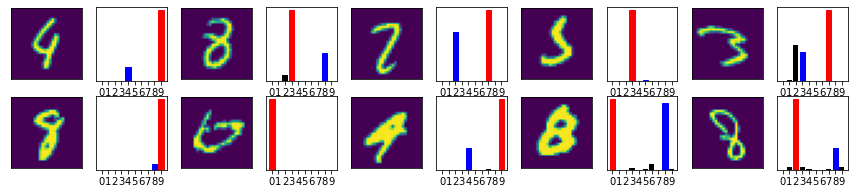

In [12]:
plt.figure(figsize=(15,3))
i = 0
for t in range(len(test_images)):
  if np.argmax(predictions[t]) == test_labels[t]: continue
  elif i == 10 : break;
  plt.subplot(2,10,2*i + 1)
  print_image(test_images[t])
  plt.subplot(2,10,2*i + 2)
  print_pred(predictions[t], test_labels[t])
  i += 1
plt.show()